# Grade Assignment 2:

## 40/100

In [2]:
# -*- coding: utf-8 -*-
"""Homework Assignment 2.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1Oggq0vpjNr0nORsRWxcbg7rJwTi-RN3I
"""



"""Problem 1:

I am assuming that the list of accidents are independent. Although there could be an impact of past accidents on traffic and future accident incidence rate, this impact is assumed to be insignificant.

I am also assuming that the list of accidents describes measurements that are consistent. Perhaps they were measured on the same day each week or during the same time interval during each day.

Lastly, I am assuming that the measurements follow a random Gaussian distribution. I am given no conflicting or further information.
"""

#Code Block 1

import numpy as np
import matplotlib.pyplot as plt
import statistics

accidents = [16, 24, 16, 12, 16, 11, 14, 15, 9, 14, 7] #accidents in a given hour during rush hour

statistics.mean(accidents) # 14
statistics.stdev(accidents) # 4.4721

def Gaussian_prob(x, _mu=14, _sigma=4.47):  # Assume independence and Gaussian distribution)
    return (1/np.sqrt(2*np.pi*_sigma**2))*np.exp(-(x-_mu)**2/(2*_sigma**2))
  
accident_prob = [Gaussian_prob(x, _mu=14, _sigma=4.47) for x in accidents]
print(accident_prob)

[0.08074796381425538, 0.007308503658363666, 0.08074796381425538, 0.08074796381425538, 0.08074796381425538, 0.07125131369121346, 0.08924883230457108, 0.08704319061603474, 0.04774292515191315, 0.08924883230457108, 0.026186849148441962]


## The number of accidents follow the poisson distribution rather than a Gaussian since the probability of being in an accident is tiny but there are many cars and close encounters out there, which makes this random variable to be more likely to follow a Poisson. However, you can assume the $\sigma=\sqrt{\mu}$ in order to use the Gaussian distribution. 

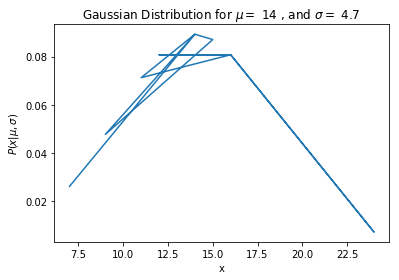

In [5]:
plt.plot(accidents, accident_prob)

plt.title("Gaussian Distribution for $\mu=$ 14 , and $\sigma=$ 4.7")
plt.xlabel(r"x")
plt.ylabel(r"$P(x|\mu, \sigma)$")

plt.show()

In [6]:
# Given the observed measurements, I will assume that the range will be at least 7 accidents and at most 24.

given_accident_average, given_accident_stdev = 14, 4.47
sim_accident_average, sim_accident_stdev = 17, 6 #assumed values


accidents_span= np.arange(7, 24, 0.001)

prob_given=np.zeros(len(accidents_span)) #based off of observed measurements
prob_simulated=np.zeros(len(accidents_span)) #based off of simulated measurements

for i, m in enumerate(accidents_span):
    prob_given[i]=Gaussian_prob(given_accident_average, _mu=m, _sigma=given_accident_stdev)
    prob_simulated[i]=Gaussian_prob(sim_accident_average, _mu=m, _sigma=sim_accident_stdev)
    
# Joint Distribution

joint_prob = prob_given*prob_simulated

# Normalize

Normalization = len(accidents_span)/(sum(joint_prob)*(max(accidents_span)-min(accidents_span)))
joint_prob_normalized = joint_prob*Normalization

accidents_max_prob = accidents_span[joint_prob==max(joint_prob)] #Finding Max

print(accidents_max_prob)

# ESTIMATION: 15.071 accidents in 1 day.

[15.071]


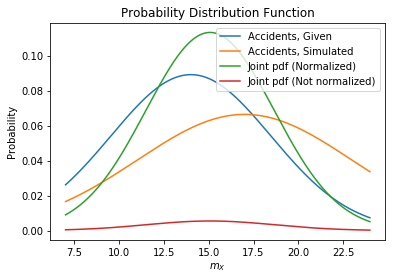

In [8]:
# Plotting, just for fun (mainly just using the notes)

plt.plot(accidents_span, prob_given, label="Accidents, Given")
plt.plot(accidents_span, prob_simulated, label="Accidents, Simulated")

plt.plot(accidents_span, joint_prob_normalized, label="Joint pdf (Normalized)")
plt.plot(accidents_span, joint_prob, label="Joint pdf (Not normalized)")

plt.title(r"Probability Distribution Function")
plt.xlabel(r"$m_X$")
plt.ylabel(r"Probability")

plt.legend()
plt.show()

# looks good

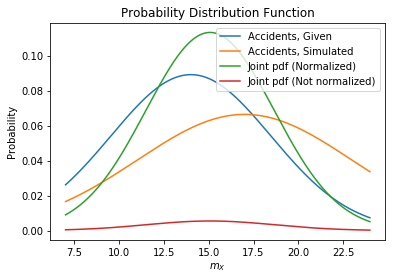

In [7]:
"""Problem 2 Assumptions

I am assuming that values will follow a uniform prior. 
I am not given mu or sigma values, so I will be simulating based on the inputted vectors. 
I will assume when simulating that values will range from minimum to maximum values of the given vectors fed into the function. 
I will sample 1000 values for mu and sigma measurements.

****Modified July 16th.
"""

import numpy as np
import matplotlib.pyplot as plt

def Problem_2 (mu_vector, sig_vector): # Assuming a uniform prior
  
  mu_i = mu_vector[i]
  sig_i = sig_vector[i]
      
  mu_sample = np.linspace((min(mu_vector)), (max(mu_vector)), 1000) # Sampling from given vectors for mu and sigma
  sig_sample = np.linspace((min(sig_vector)), (max(sig_vector)), 1000)
  
  for i in enumerate(mu_sample):
    mu_span = np.arange((min(mu_sample)), (max(mu_sample)), 0.001) # Finding PDF...
    
  for i in enumerate(sig_sample):
    sig_span = np.arange((min(sig_sample)), (max(mu_sample)), 0.001)
   
  prob_mu=np.zeros(len(mu_span)) #arrays for storing probabilities
  prob_sig=np.zeros(len(sigma_span))
  
  # Joint PDF (analytical: joint probability of ALL mus and ALL sigmas, each multiplied iteratively)
  
  for i, m in enumerate(mu_span): 
    prob_mu[i]=Gaussian_prob(mu_span[i], _mu=m, _sigma=sig_vector)
    prob_mu[i] = prob_mu[i]*prob_mu[i+1]
    
  for i, m in enumerate(sig_span):
    prob_sig[i]=Gaussian_prob(sig_span[i], _mu=m, _sigma=sig_vector)
    prob_sig[i]=Gaussian_prob(sig_span[i], _mu=m, _sigma=sig_vector)
    
  def multi_gaussian(mu1,mu2,sigma1,sigma2):
    return (mu1*sigma2**2+mu2*sigma1**2)/(sigma1**2+sigma2**2), (sigma2*sigma1)/np.sqrt(sigma1**2+sigma2**2)
  
  for x in prob_mu[i], prob_sig[i]:
    multi_gaussian(prob_mu[i], prob_mu[i+1],prob_sig[i], prob_sig[i+1]) # iterates for all values in vectors prob_mu and prob_sig, returns joint probabilities

In [10]:
def multi_gaussian(mu1,mu2,sigma1,sigma2):
    return (mu1*sigma2**2+mu2*sigma1**2)/(sigma1**2+sigma2**2), (sigma2*sigma1)/np.sqrt(sigma1**2+sigma2**2)

In [11]:
def N_Gaussian(mu_list, sigma_list):
    mu0, sigma0 = mu_list[0], sigma_list[0]
    for mu, sigma in zip(mu_list[1:], sigma_list[1:]):
        mu0, sigma0 = multi_gaussian(mu0, mu, sigma0, sigma)
    return mu0, sigma0

In [12]:
N_Gaussian([10, 12, 20, 21], [2, 1, 1.5, 5])

(13.969250480461243, 0.7593111953288307)